<a href="https://colab.research.google.com/github/vinayakrajurs/Informer-Battery-Dataset/blob/main/Informer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Attention based Battery Parameter Augmentation Technique to Alleviate Limited Data Challenges** 

### **1. Mounting Drive**

1. Download the zip code from github

2. Upload the downloaded file to your drive and open the file using Zip extractor

3. Extract all the files in the drive

4. Mount the Drive by running the cell below

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2. Changing Directory path**

###### **Steps To Follow**

1. Once the drive has been mounted, go to the folder icon visible on the left hand side.

2. Click on the drive folder.

3. There find the folder containing the main_informer.py file.

4. Right click on the folder and click on the folder and select the copy path option.

5. Make sure to copy and paste the path of the folder containing the main_informer.py file in the code below. 

6. Paste the file path after %cd




In [2]:
%cd /content/drive/MyDrive/Informer_2021/Inf.zip (Unzipped Files)/Inf/Informer2020-main
!ls

/content/drive/MyDrive/Informer_2021/Inf.zip (Unzipped Files)/Inf/Informer2020-main
checkpoints  img	     main_informer.py  requirements.txt  utils
data	     Informer.ipynb  models	       results
exp	     LICENSE	     README.md	       scripts


### **3. Running the Main code**

1. All changes to the Prediction Length, epochs, dataset, etc can be made in the main_informer.py file
2. Insertion of a new dataset must be done in the data folder as well as adding the data as a custom data in data_loader.py Line 192
3. You may make changes in the dataset used in main_informer.py and target to be run

In [ ]:
!python -u main_informer.py --model informer --data Battery --attn prob --freq s --features S

Args in experiment:
Namespace(activation='gelu', attn='prob', batch_size=32, c_out=1, checkpoints='./checkpoints/', cols=None, d_ff=2048, d_layers=1, d_model=512, data='Battery', data_path='dataset4.csv', dec_in=1, des='test', detail_freq='s', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', enc_in=1, factor=5, features='S', freq='s', gpu=0, inverse=True, itr=2, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', mix=True, model='informer', n_heads=8, num_workers=0, output_attention=False, padding=0, patience=3, pred_len=24, root_path='/content/drive/MyDrive/Informer_2021/Inf.zip (Unzipped Files)/Inf/ETDataset-main/ETT-small', s_layers=[3, 2, 1], seq_len=96, target='Voltage', train_epochs=2, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
>>>>>>>start training : informer_Battery_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 2771
val 391
test 802
E

### **4. Results**

##### **Changing Directory path**

1. Once the code is run, a results folder will be created in the same folder which contains main_informer.py file.

2. The result folder contains 2 folders for train and test runs.

3. Copy the path for either one of the folders and paste it in the code below.
             
4. %cd /content/drive/MyDrive/Informer_2021/Inf.zip (Unzipped Files)/Inf/Informer2020-main/results/informer_Battery_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0
!ls

5. The folder addres in which the result is stored will be printed while running the main_informer.py code in the cell above

6. The underline code depicts the address of the test results

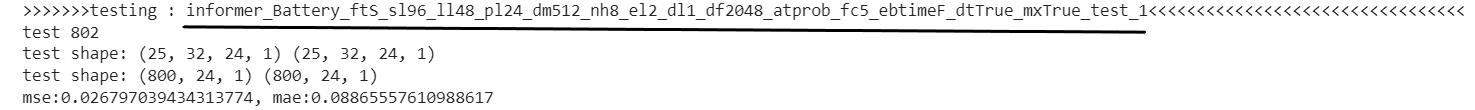




In [ ]:
%cd /content/drive/MyDrive/Informer_2021/Inf.zip (Unzipped Files)/Inf/Informer2020-main/results/informer_Battery_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0
!ls


/content/drive/MyDrive/Informer_2021/Inf.zip (Unzipped Files)/Inf/Informer2020-main/results/informer_Battery_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0
charge_cap1.pdf   charge_cap61.png     discharge_cap22.png	    plot.pdf
charge_cap1.png   charge_cap62.pdf     discharge_cap41.pdf	    plot.png
charge_cap22.pdf  charge_cap62.png     discharge_cap61.pdf	    pred.npy
charge_cap22.png  discharge_cap21.pdf  discharge_cap62.pdf	    true.npy
charge_cap42.pdf  discharge_cap21.png  informerDischarge_cap21.pdf
charge_cap42.png  discharge_cap22.pdf  metrics.npy


##### **4 a. True and Prediction values**

1. When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment

2. The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)

In [ ]:
import numpy as np
# When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment
# The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)
preds = np.load('pred.npy')
trues = np.load('true.npy')
# [samples, pred_len, dimensions]
import matplotlib.pyplot as plt
import seaborn as sns


##### **4 b. Matplotlib to plot the results**

1. You can remove the # from .savefig and .download to save and download the plot in pdf format on your local PC 

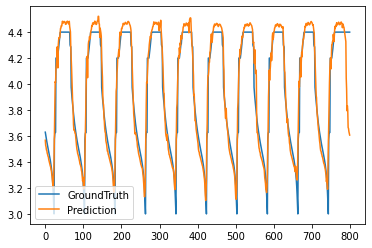

In [ ]:
plt.figure()
plt.plot(trues[:,1,-1], label='GroundTruth')
plt.plot(preds[:,1,-1], label='Prediction')
plt.legend()
from google.colab import files
#plt.savefig('informerDischarge_cap21.pdf')
#files.download('informerDischarge_cap21.pdf')
plt.show()


In [ ]:
#end